<a href="https://colab.research.google.com/github/nithinganesh1/Deep_Learning_Projects/blob/main/Argus_Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helmet Detection

## importing tf and checking gpu availability

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 219734207880436397
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1172635917362594993
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Labeling

In [ ]:
## datas are labeld using labelme

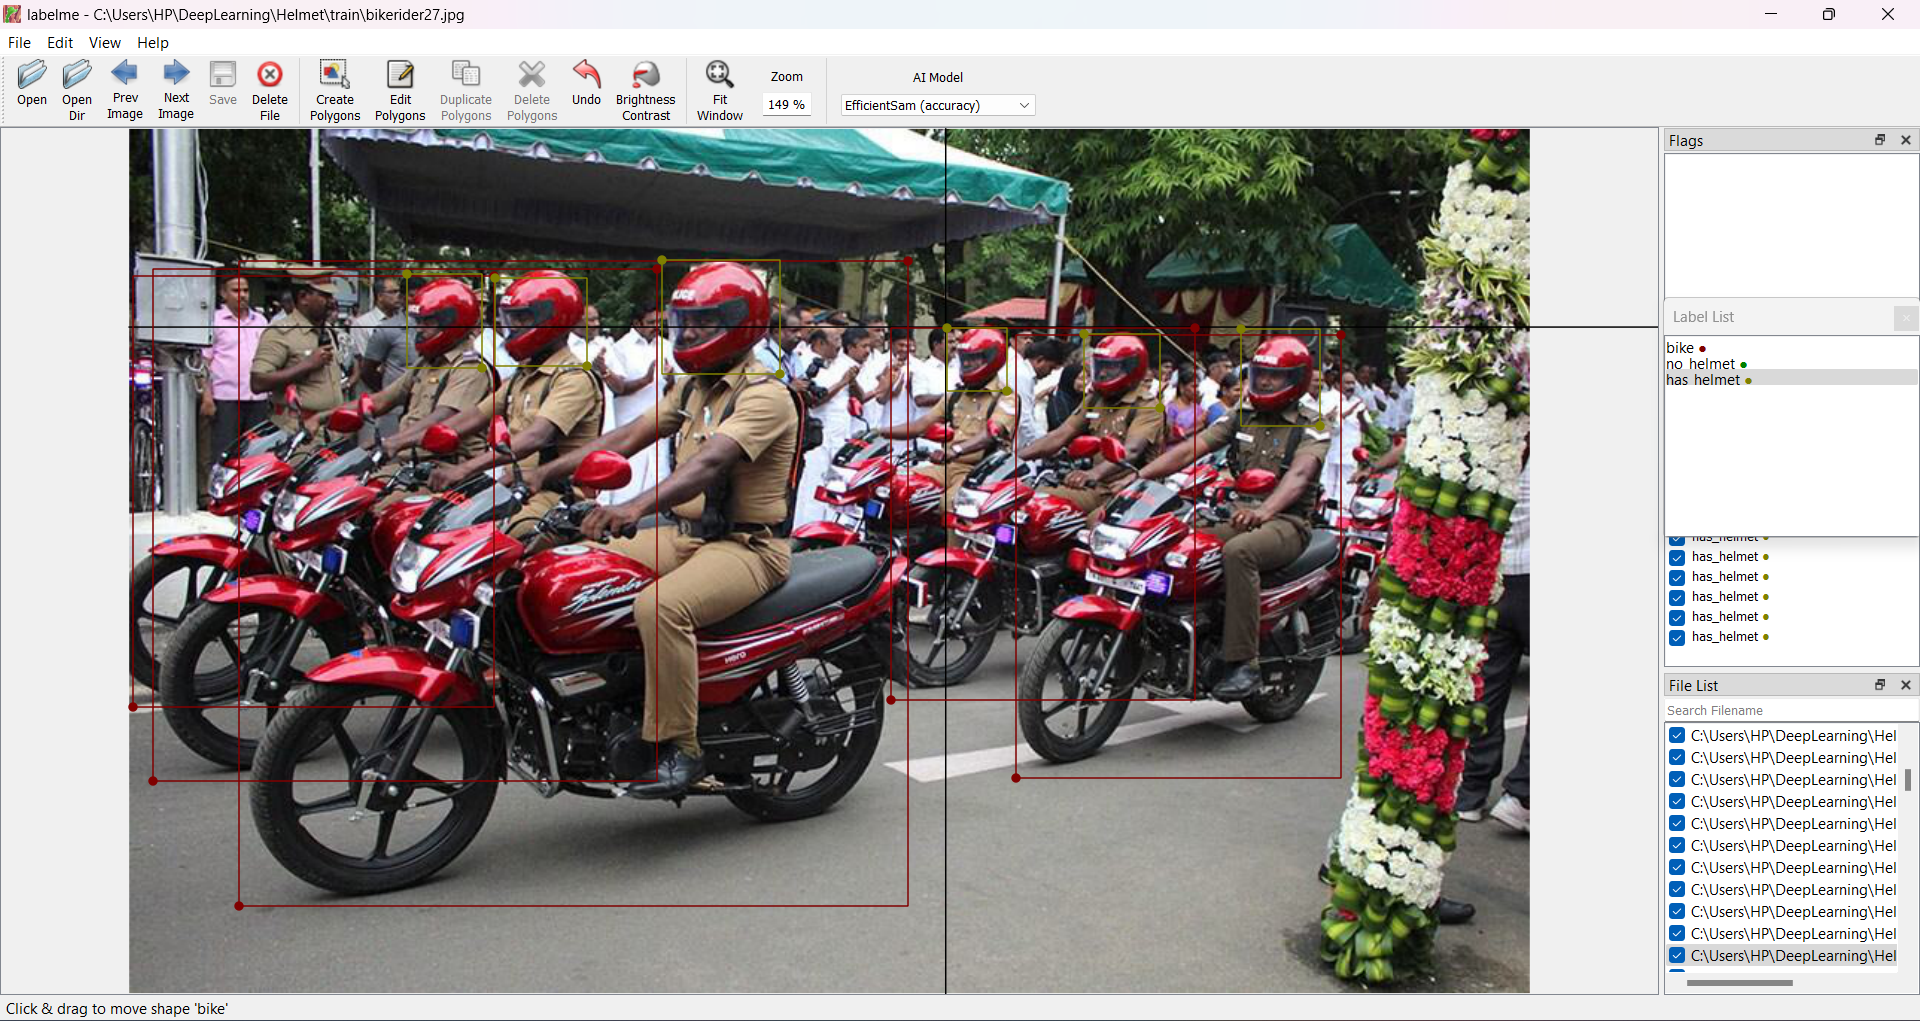

### Import libraries

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# creating folders to upload data
!mkdir -p Helmet/train/images Helmet/test/images Helmet/train/labels Helmet/test/labels

In [5]:
train = tf.data.Dataset.list_files('Helmet/train/images/*.jpg')

def resize_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image)
  image = tf.image.resize(image, (300, 300))
  image = image / 255.0
  return image

train = train.map(resize_image)


In [6]:
train.as_numpy_iterator().next()

array([[[0.44959477, 0.4339085 , 0.38684967],
        [0.4359357 , 0.42024943, 0.3731906 ],
        [0.4342719 , 0.42642877, 0.37544838],
        ...,
        [0.20405225, 0.18444441, 0.160915  ],
        [0.20023526, 0.18847056, 0.16101958],
        [0.18598692, 0.18909805, 0.1577255 ]],

       [[0.48759583, 0.47457623, 0.42351738],
        [0.48614743, 0.4807843 , 0.42631057],
        [0.48609936, 0.4822562 , 0.42727584],
        ...,
        [0.21059605, 0.19098821, 0.1674588 ],
        [0.19544469, 0.18367998, 0.15622899],
        [0.1880664 , 0.19117752, 0.15980497]],

       [[0.4952392 , 0.49798432, 0.43563136],
        [0.48651767, 0.49749804, 0.4312235 ],
        [0.46860132, 0.4795817 , 0.4133072 ],
        ...,
        [0.21922876, 0.1996209 , 0.17609149],
        [0.20039216, 0.18862745, 0.16117646],
        [0.20130979, 0.20442091, 0.17304836]],

       ...,

       [[0.6181593 , 0.58717877, 0.50561   ],
        [0.65815824, 0.6271778 , 0.54560894],
        [0.6322744 , 0

In [ ]:
type(train)

tensorflow.python.data.ops.map_op._MapDataset

### View Raw Images with Matplotlib

In [7]:
image_generator = train.batch(8).as_numpy_iterator()

In [8]:
plot_images = image_generator.next()

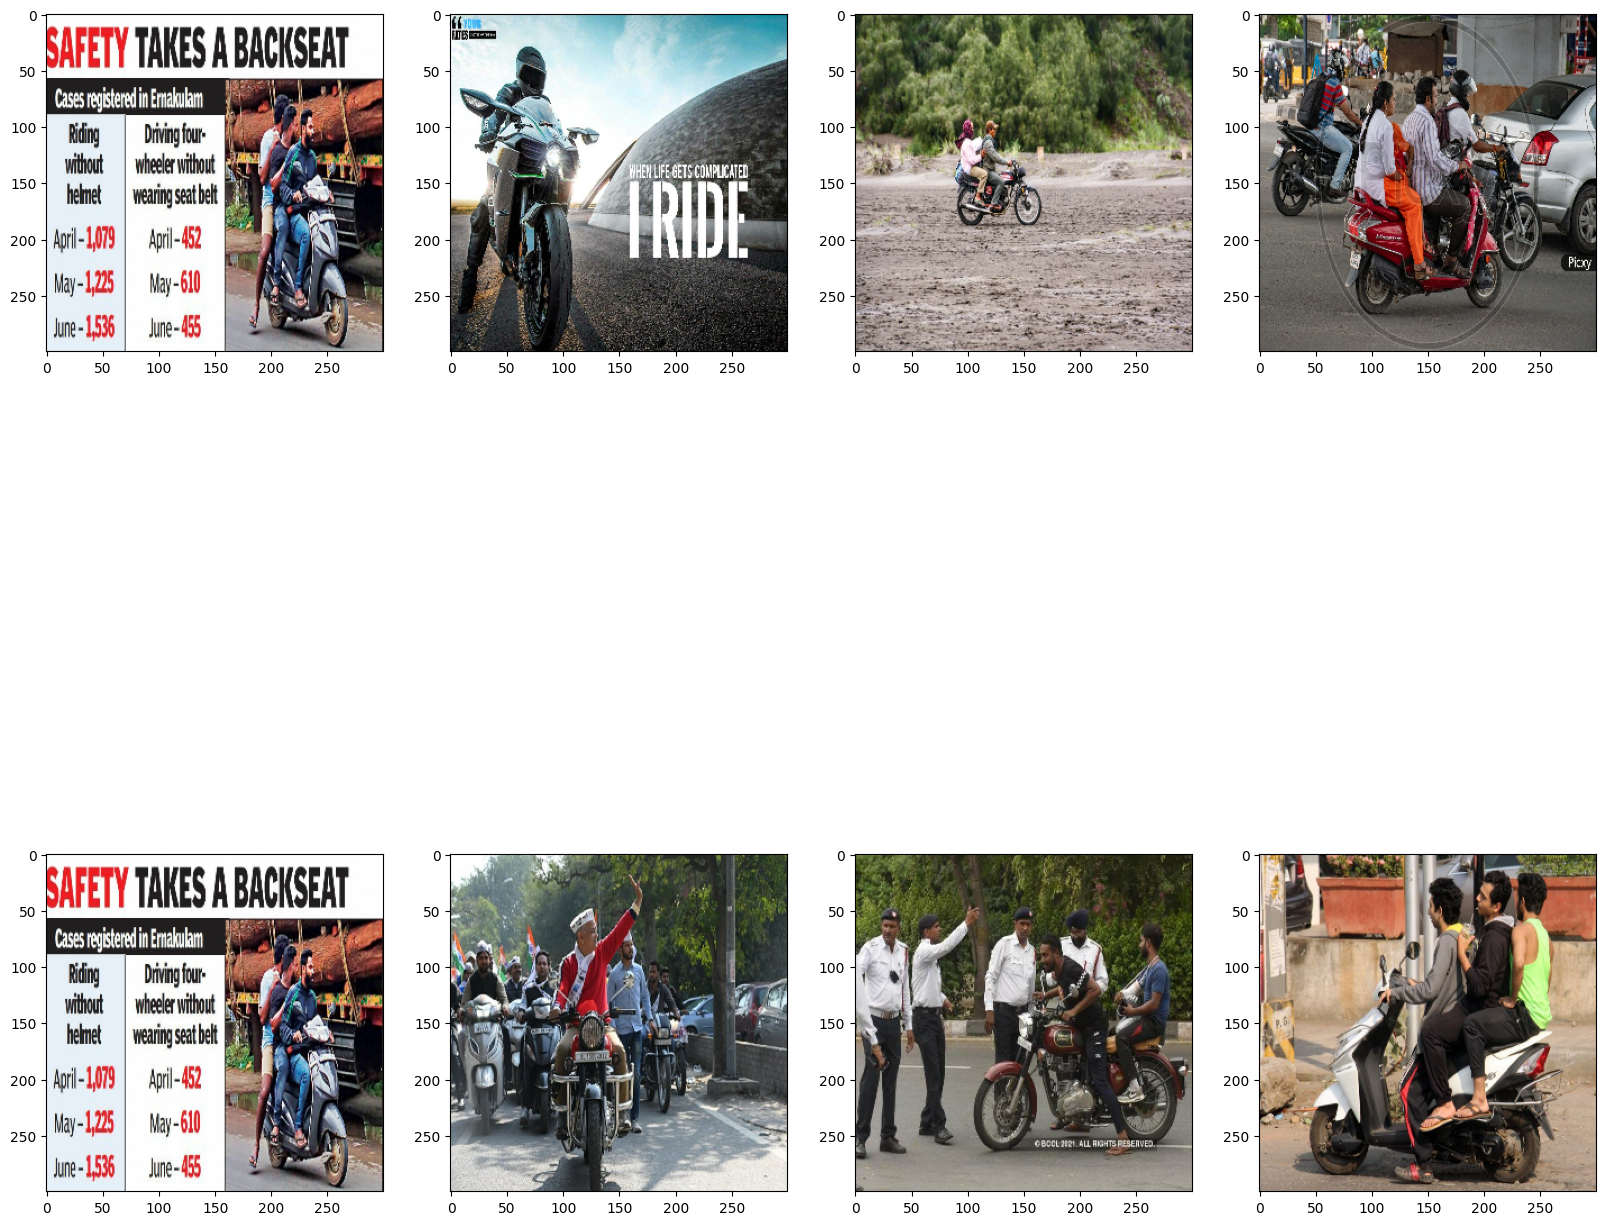

In [9]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))
for row_idx in range(2):
    for col_idx in range(4):
        ax[row_idx, col_idx].imshow(plot_images[row_idx * 4 + col_idx])
plt.show()

## Apply Image Augmentation on Images and Labels using Albumentations

In [10]:
import albumentations as alb

In [11]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [26]:
import cv2

img_path = '/content/Helmet/train/images/bikerider0.jpg'
img = cv2.imread(img_path)

In [27]:
img

array([[[255, 217, 132],
        [254, 216, 128],
        [255, 215, 128],
        ...,
        [ 49,  76,  37],
        [ 41,  66,  28],
        [ 35,  60,  22]],

       [[255, 219, 131],
        [255, 218, 128],
        [255, 218, 129],
        ...,
        [ 62,  89,  50],
        [ 56,  81,  43],
        [ 49,  74,  36]],

       [[252, 219, 126],
        [252, 220, 125],
        [255, 222, 128],
        ...,
        [ 85, 113,  77],
        [ 78, 104,  68],
        [ 66,  92,  56]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 123, 114],
        [129, 124, 115],
        [126, 121, 112]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [127, 122, 113],
        [127, 122, 113],
        [124, 119, 110]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [117, 112, 103],
        [116, 111, 102],
        [114, 109, 100]]

In [30]:
import os
with open(os.path.join('Helmet', 'train', 'labels','bikerider0.json'), 'r') as f:
    label = json.load(f)

In [31]:
label

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': 'bike',
   'points': [[346.3503649635037, 19.839416058394164],
    [733.9416058394161, 624.948905109489]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': 'bike',
   'points': [[173.3576642335767, 26.408759124087595],
    [408.39416058394164, 493.5620437956204]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': 'bike',
   'points': [[747.8102189781022, 33.70802919708029],
    [881.3868613138686, 313.2700729927007]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': 'bike',
   'points': [[955.8394160583941, 2.3211678832116838],
    [1198.8511579916774, 627.0]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': 'no_helmet',
   'points': [[564.5985401459855, 

In [43]:
label_path =  '/content/Helmet/train/labels/bikerider0.json'
def load_image_and_bboxes(img_path, label_path):
    with open(label_path, "r") as f:
        label_data = json.load(f)
    image = cv2.imread(image_path)
    bboxes = []
    labels = []
    for obj in label_data["shapes"]:
        bbox = obj["points"]
        label = obj["label"]
        bboxes.append(bbox)
        labels.append(label)
    return image, bboxes, labels

In [48]:
image_paths = []
bboxes_list = []
labels_list = []

image_dir = "/content/Helmet/train/images"
label_dir = "/content/Helmet/train/labels"

def has_label_file(image_path):
  label_path = os.path.join(label_dir, os.path.splitext(image_path)[0] + ".json")
  return os.path.exists(label_path)

# Loop through your dataset and load images and labels
for filename in os.listdir(image_dir):
  image_path = os.path.join(image_dir, filename)
  if has_label_file(image_path):
    label_path = os.path.join(label_dir, os.path.splitext(filename)[0] + ".json")
    try:
      image, bboxes, labels = load_image_and_bboxes(image_path, label_path)
      image_paths.append(image_path)
      bboxes_list.append(bboxes)
      labels_list.append(labels)
    except Exception as e:  # Handle potential errors during label loading (optional)
      print(f"Error loading label for {image_path}: {e}")

In [53]:
image_paths

[]